# Install package

In [16]:
!pip install phenoAI-0.1-py3-none-any.whl

Processing c:\users\akash beniwal\phenoai-0.1-py3-none-any.whl


# Import package

In [1]:
from phenoAI

Documentation:
This Package contains two module-

1.trainPhenoAI(dataset_path, epochs,learning_rate, batch_size,is_augmentation): To make phenological Model by training through Image Dataset.
dataset_path: dataset location(Containing images and labels).
Optional Parameters:
epochs,learning_rate, batch_size,is_augmentation(True if we want to add more data using Augmentation)

It has below functions:
reTrain(epochs): For Training the model for more epochs
performanceReport(): Gives us loss(or metrics) vs epochs graphs, scores of test data prediction
saveModel(path_location): Where phenological Model to be saved. You can provide folder location(model will be saved by default name in that folder) or folder location along with model name in zip format, for example- 'C:/your_model_name.zip'

2. loadModel(model,dataset_path,class_name,date_pattern,required_rois): To make analysis object. It provides phenological parameters, chronological coefficients, plots etc.
Here, model: it can be model z

# Training Segmentation Model

In [ ]:
from phenoAI import trainPhenoAI

In [ ]:
dataset_path=r'G:\Intern project\DATA SET\Labelled Dataset'

In [3]:
pheno_model =trainPhenoAI(dataset_path, epochs = 35,learning_rate = 0.001, batch_size = 16,is_augmentation = True)

Saving Image masks of Json labels...|done

Orderwise Classes names:  ['deciduous', 'coniferous']

Loading Dataset images and masks for training...|done

Training the model...
Epoch 1/35
45/45 [==============================] - 42s 928ms/step - loss: 1.2373 - iou_score: 0.2254 - f1-score: 0.3038 - val_loss: 1.2351 - val_iou_score: 0.2599 - val_f1-score: 0.3271
Epoch 2/35
45/45 [==============================] - 20s 445ms/step - loss: 0.9516 - iou_score: 0.3815 - f1-score: 0.4462 - val_loss: 0.9057 - val_iou_score: 0.4516 - val_f1-score: 0.4965
Epoch 3/35
45/45 [==============================] - 20s 447ms/step - loss: 0.8449 - iou_score: 0.4226 - f1-score: 0.4826 - val_loss: 0.8483 - val_iou_score: 0.5100 - val_f1-score: 0.5514
Epoch 4/35
45/45 [==============================] - 20s 448ms/step - loss: 0.7875 - iou_score: 0.5296 - f1-score: 0.4889 - val_loss: 0.8119 - val_iou_score: 0.5111 - val_f1-score: 0.5488
Epoch 5/35
45/45 [==============================] - 20s 448ms/step - loss: 0.

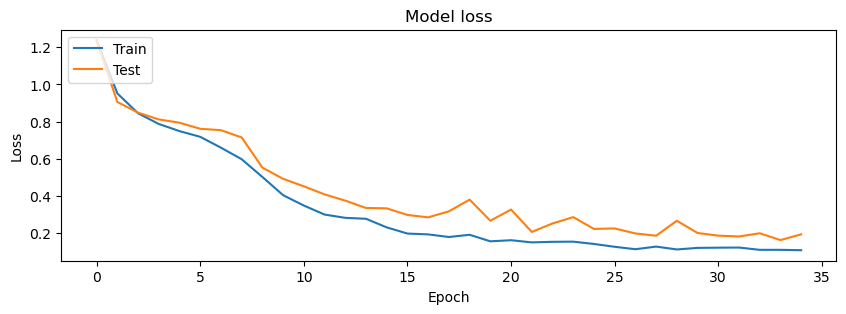

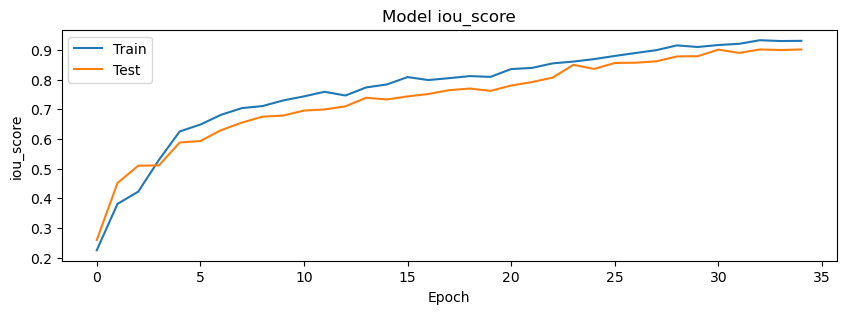

Test performance:
loss:  0.1948
iou : 0.9014
f1-score : 0.8418


In [8]:
pheno_model.performanceReport()

In [16]:
pheno_model.reTrain(epochs = 5)

Epoch 1/5
45/45 [==============================] - 20s 451ms/step - loss: 0.1058 - iou_score: 0.9320 - f1-score: 0.9031 - val_loss: 0.1914 - val_iou_score: 0.9090 - val_f1-score: 0.8617
Epoch 2/5
45/45 [==============================] - 20s 453ms/step - loss: 0.0904 - iou_score: 0.9489 - f1-score: 0.9102 - val_loss: 0.1888 - val_iou_score: 0.9120 - val_f1-score: 0.8802
Epoch 3/5
45/45 [==============================] - 20s 450ms/step - loss: 0.1024 - iou_score: 0.9410 - f1-score: 0.9222 - val_loss: 0.1642 - val_iou_score: 0.9012 - val_f1-score: 0.8925
Epoch 4/5
45/45 [==============================] - 20s 451ms/step - loss: 0.0881 - iou_score: 0.9444 - f1-score: 0.9337 - val_loss: 0.1682 - val_iou_score: 0.9093 - val_f1-score: 0.9081
Epoch 5/5
45/45 [==============================] - 20s 451ms/step - loss: 0.0880 - iou_score: 0.9467 - f1-score: 0.9527 - val_loss: 0.1567 - val_iou_score: 0.9121 - val_f1-score: 0.9234


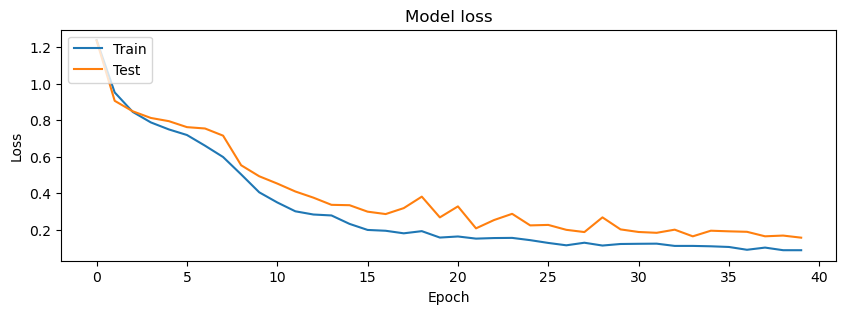

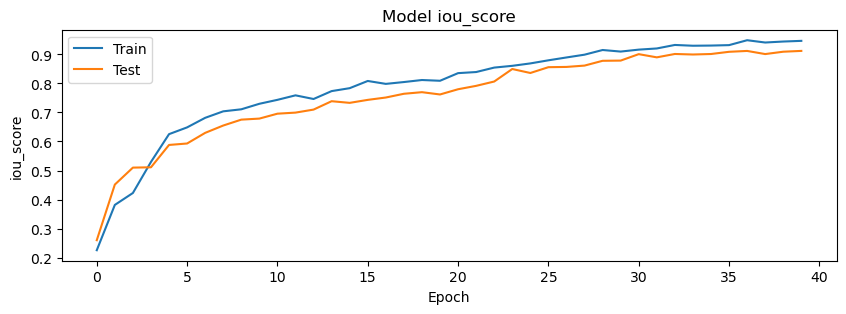

Test performance:
loss:  0.1567 
iou : 0.9121 
f1-score : 0.9234


In [16]:
pheno_model.performanceReport()

In [17]:
pheno_model.saveModel('G:')

Model saved to  G:/06-22-2023_15.09_model.zip


# Phenology Analysis

In [ ]:
from phenoAI import loadModel

In [ ]:
model_path = 'G:/06-22-2023_15.09_model.zip'

In [ ]:
dataset_path = r"G:\DATASET_2016"

In [ ]:
date_pattern = "*yyyy_mm_dd*"

In [ ]:
class_name = 'coniferous'

In [19]:
pheno = loadModel(model,dataset_path,class_name,date_pattern) 

Loading Vegetation segmentation Model...|done
Importing Dataset...|done
Creating ROIs in the vegetation segment...|done
Extracting Chromatic chromatic coordinate from Images...|done
Calculating phenological Parameters...|done


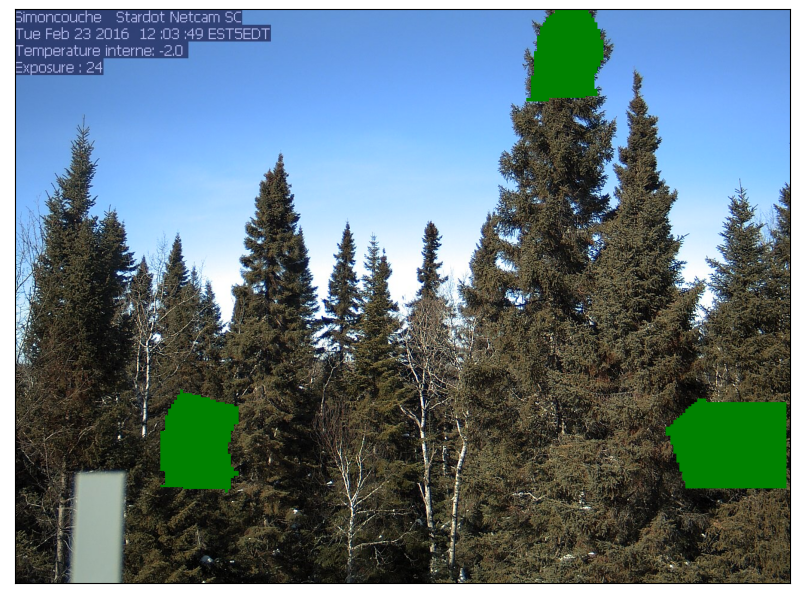

In [28]:
pheno.showROIs()

In [ ]:
pheno.saveROIsImage(r"G:")

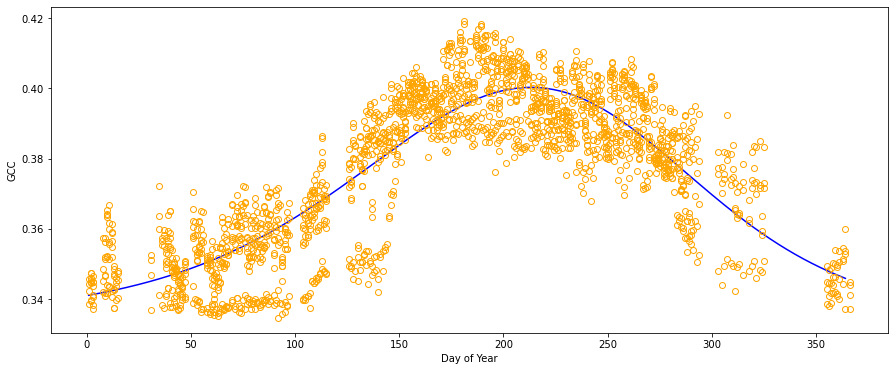

In [26]:
pheno.plotGCC()

In [ ]:
pheno.saveGCCPlot(r"G:")

In [20]:
min, max, slope1, SoS, slope2 , EoS = pheno.extractGCCParameters()#6 parameters( min, max, slope1, SoS, slope2 , EoS)

print('minmum GCC: ', min)
print('maximum GCC: ', max)
print('start of season(DoY): ',int(SoS))
print('End of season: ',int(EoS))
print('greenary increasing rate: ',slope1)
print('Greenary decreasing rate: ',slope2)

minmum GCC:  0.3464479257718621
maximum GCC:  0.39551133633289576
start of season(DoY):  129
End of season:  264
greenary increasing rate:  0.05064492444064422
Greenary decreasing rate:  0.01971216863297839


In [ ]:
pheno.saveCCsTimeSeries(r"G:\Intern project\DATA SET\Labelled Dataset\sdgtrjsr") ## saved in xlsx format